In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
mc_data = pd.read_json('../datasets/SciFi_200000_Clean_TrackStudy.json')
real_data = pd.read_json('../datasets/SciFi_200000_AllHits.json')

In [7]:
###### Data columns
i = 0
print('\n Clean TrackStudy Dataset:\n')
for val in mc_data.columns:
    print(i," ",val)
    i = i + 1
print('\n AllHits Dataset:\n')
# Data columns
i = 0
for val in real_data.columns:
    print(i," ",val)
    i = i + 1


 Clean TrackStudy Dataset:

0   MCParticleID
1   MC_Hit_X
2   MC_Hit_Y
3   MC_Hit_Z
4   PrHit_LHCbID
5   PrHit_Xat0
6   PrHit_Zat0
7   PrHit_isX
8   PrHit_planeCode
9   PrHit_w2
10   PrHit_yMax
11   PrHit_yMin
12   PrHit_zone
13   event

 AllHits Dataset:

0   Event
1   Hit_LHCbID
2   Hit_Xat0
3   Hit_YMax
4   Hit_YMin
5   Hit_Zat0
6   Hit_dxDy
7   Hit_dzDy
8   Hit_isX
9   Hit_planeCode
10   Hit_w
11   Hit_zone
12   run


In [8]:
mc_hits = mc_data.values
real_hits = real_data.values

In [9]:
zLays = [7825.99951172, 7895.99951172, 7966.        , 8036.00048828,
       8507.99902344, 8577.99902344, 8647.99902344, 8718.00097656,
       9192.99902344, 9262.99902344, 9332.99902344, 9403.00097656]

max_x = 3182.8356933594
min_x = -3182.8576660156
min_y = -2438.6506347656
max_y = 2438.6506347656

In [10]:
# Create X and Y matrices for the future model
length = mc_hits.shape[0]

X = np.zeros((length, 1))
Y = np.zeros((length, 11))

i = 0
empty_particles = []
for i in range(0,length):
    
    if ((len(mc_hits[i][5]) > 1)):
        # Get the first element of the hit, in the first layer
        X[i] = mc_hits[i][5][0]
        
        # Get only the first element if there are several repeated with small differences
        j = 0
        extra_hits = mc_hits[i][5]
        try:
            while (np.abs(extra_hits[j] - extra_hits[j + 1]) < 5):
                j += 1
            j += 1
        except IndexError as e:
            X[i] = np.zeros(1)
            continue
        
        # Get all hits from the given particle which are not located in the first layer
        extra_hits = mc_hits[i][5][j:]
        actual_pos = 0
        j = 0
        try:
            while (j < len(extra_hits)):
                Y[i][actual_pos] = extra_hits[j]
                # Same as above, get only the first element in case there are several hits with similar X position
                while (j + 1 < len(extra_hits) and np.abs(extra_hits[j] - extra_hits[j + 1]) < 3):
                    j += 1
                actual_pos += 1
                j += 1
        except IndexError:
            X[i] = np.zeros(1)
            Y[i] = np.zeros(11)

In [11]:
# Removing empty values, as some hits in the mc_hits dataset do not contain readings (PrHit...)
Y = Y[Y[:,0] != 0]
X = X[X[:,0] != 0]

In [12]:
X_tmp = np.array([min_x, max_x])
Y_tmp = np.array([min_y, max_y])
X_tmp.ndim

1

In [13]:
def showTracksMCHits(electrons, elev, angle, max, alpha):
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    if alpha != 0:
        xs = np.linspace(min_x, max_x)
        ys = np.linspace(min_y, max_y)
        X_tmp, Z_tmp = np.meshgrid(xs, ys)

        for layer in zLays:
            ax.plot_surface(X_tmp, layer, Z_tmp, alpha=alpha)
    
    
    # Ensure that the next plot doesn't overwrite the first plot
    ax = plt.gca()
    
    i = 0
    # Iterate through all the particles keys obtained 
    for particle in mc_hits:
        
        if (electrons and (particle[0] == 11) and (particle[12] == 0)):
            continue
        
        if (len(particle[5]) > 1):
            X = np.array(particle[5]).astype(float)
            Y = np.zeros(len(particle[5]))
            Z = np.array(particle[6]).astype(float)

            ax.plot(X, Z, Y)

            i = i + 1
            if i == max:
                break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    ax.set_xlabel('X position')
    ax.set_ylabel('Z position')
    ax.set_zlabel('Y position')
    plt.show()

In [60]:
print(X.shape)
print(Y.shape)
np.unique(mc_hits[:,13])

(140936, 1)
(140936, 11)


array([15837, 15838, 15839, 15840, 15841, 15842, 15843, 15844, 15845,
       15846, 15847, 15848, 15849, 15850, 15851, 15852, 15853, 15854,
       15855, 15856, 15857, 15858, 15859, 15860, 15861, 15862, 15863,
       15864, 15865, 15866, 15867, 15868, 15869, 15870, 15871, 15872,
       15873, 15874, 15875, 15876, 15877, 15878, 15879, 15880, 15881,
       15882, 15883, 15884, 15885, 15886, 15887, 15888, 15889, 15890,
       15891, 15892, 15893, 15894, 15895, 15896, 15897, 15898, 15899,
       15900, 15901, 15902, 15903, 15904, 15905, 15906, 15907, 15908,
       15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917,
       15918, 15919, 15920, 15921, 15922, 15923, 15924, 15925, 15926,
       15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935,
       15936, 15937, 15938, 15939, 15940, 15941, 17909, 17910, 17911,
       17912, 17913, 17914, 17915, 17916, 17917, 17918, 17919, 17920,
       17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929,
       17930, 17931,

In [111]:
def showPredictedTracks(min, max, event):
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    
    for layer in zLays:
        X_tmp = [min_x, max_x]
        Y_tmp = [layer, layer]
        ax.plot(X_tmp, Y_tmp, 'k-', lw=1)
    
    hits = mc_hits[mc_hits[:,13] == event]
    
    # Iterate through all the particles keys obtained 
    for i in range(min,max):
        if (len(hits[i][5]) == 0):
            continue
        X = np.array(hits[i][5]).astype(float)
        Y = np.array(hits[i][6]).astype(float)
        ax.plot(X, Y)
        
        first = hits[i][5][0]
        m = (first) / (zLays[0] - 250)
        pred = m * zLays[3]
        
        X = np.array([first, pred])
        Y = np.array([zLays[0], zLays[3]])
        #ax.text(first + 10, zLays[0] + 240, 'Prediction', fontsize=12)
        ax.plot(X, Y)
        
        first = hits[i][5][4]
        print(hits[i][5])
        m = (first) / (zLays[4] - 400)
        pred = m * zLays[7]
        
        X = np.array([first, pred])
        Y = np.array([zLays[4], zLays[7]])
        #ax.text(first + 10, zLays[0] + 240, 'Prediction', fontsize=12)
        ax.plot(X, Y)
        
            
    ax.set_xlabel('X position')
    ax.set_ylabel('Z position')
    ax.grid()
    plt.show()

In [16]:
def removeSimilar(array, max):
    clean = np.zeros(max)
    j = 0
    actual_pos = 0
    while (j < len(array)):
        clean[actual_pos] = array[j]
        while (j + 1 < len(array) and np.abs(array[j] - array[j + 1]) < 3):
            j += 1
        actual_pos += 1
        j += 1
    return clean

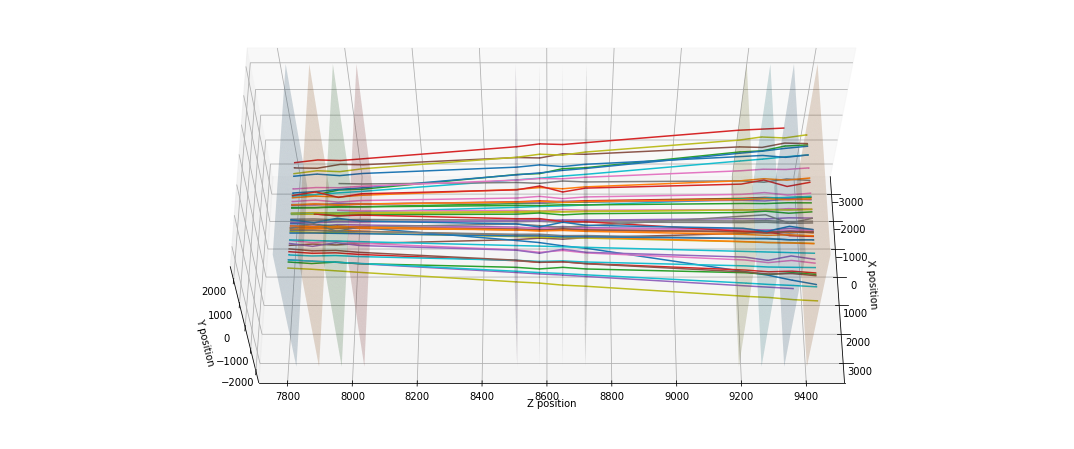

In [17]:
showTracksMCHits(True, 60, 0, 50, 0.2)

[789.5100097656, 828.978515625, 824.8378295898, 864.8900146484, 1038.2650146484, 1080.2397460938, 1074.4677734375, 1116.9350585938, 1297.7900390625, 1341.9605712891, 1334.4320068359, 1378.5350341797]


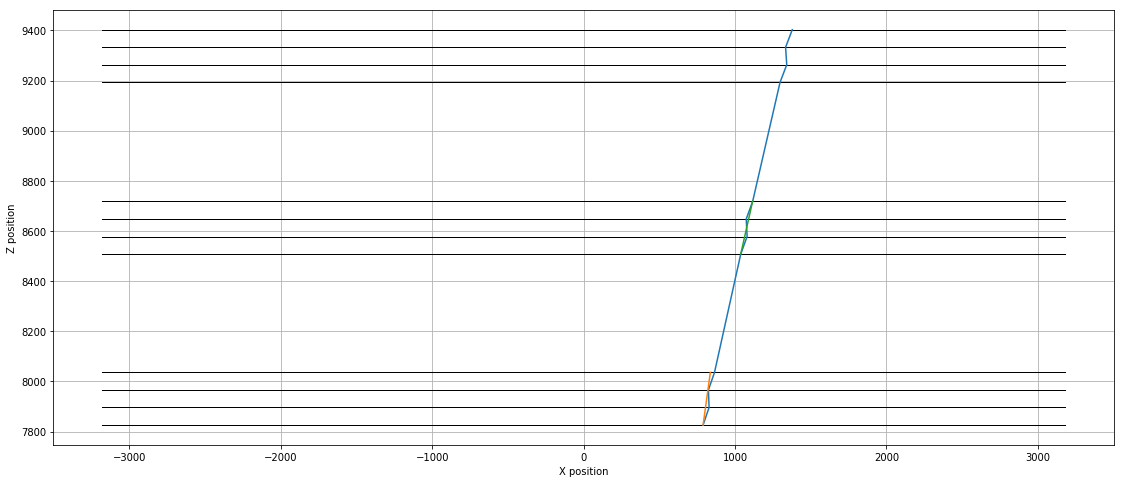

In [112]:
showPredictedTracks(10,11, 22356)

In [19]:
def showPredictedAndReal(min, max):
    
    if min < 0:
        min = max - 1
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    
    # Iterate through all the particles keys obtained 
    for i in range(min,max):
        X = np.array(mc_hits[i][1]).astype(float)
        Y = np.array(mc_hits[i][3]).astype(float)
        ax.plot(X, Y)
        textPos_X = X[int(len(X) / 2)]
        textPos_Y = Y[int(len(Y) / 2)]
        X = np.array(mc_hits[i][5]).astype(float)
        Y = np.array(mc_hits[i][6]).astype(float)
        ax.plot(X, Y)
        if (len(X) == 0):
            ax.text(textPos_X + 10, textPos_Y, 'No prediction', fontsize=12)
            
    ax.grid()
    plt.show()

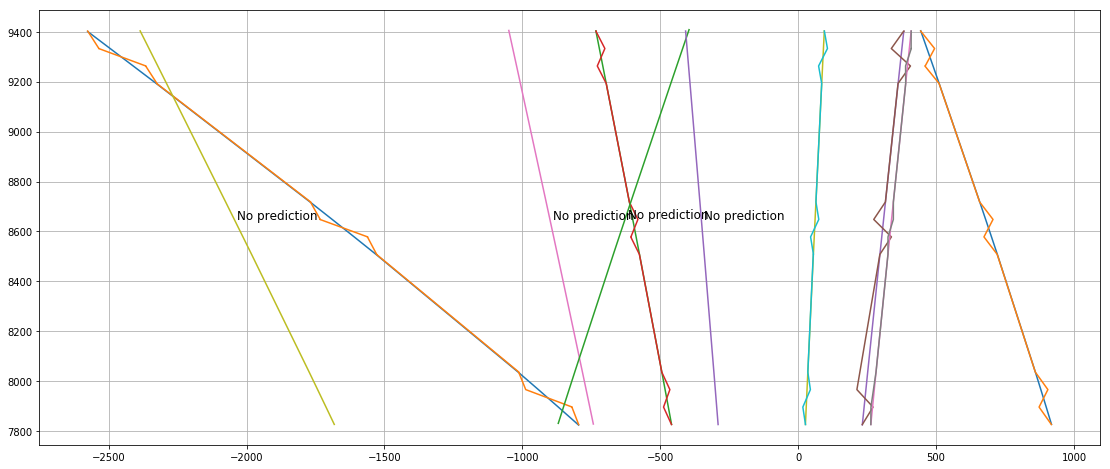

In [20]:
showPredictedAndReal(0,10)

In [21]:
listIds = []
for hit in mc_hits:
    for ids in hit[4]:
        listIds.append(ids)

In [22]:
print("Length of Ids in All MCHits in TrackStudy dataset: %d" % len(listIds))
print("Length of unique Ids: %d" % len(np.unique(listIds)))

Length of Ids in All MCHits in TrackStudy dataset: 2025994
Length of unique Ids: 465896


In [23]:
print("Min: %d; Max: %d" % (min(listIds), max(listIds)))        
print("Available Ids %d" % (max(listIds) - min(listIds)))

Min: 262144; Max: 1044479
Available Ids 782335


In [24]:
events = np.unique(real_hits[:,0])
hitsByEvent = []
for event in events:
    hitsByEvent.append(real_hits[real_hits[:,0] == event])

In [25]:
repeated_Ids = []
for i in range(0,10000):
    group = real_hits[real_hits[:,1] == real_hits[i][1]]
    if (len(group) > 1):
        for event in group:
            repeated_Ids.append(event)
repeated_Ids = np.array(repeated_Ids)

In [26]:
for event in hitsByEvent:
    print(len(event[:,1]))
    print(len(np.unique(event[:,1])))

6230
6230
6494
6494
4010
4010
8804
8804
5851
5851
8831
8831
6597
6597
5367
5367
4772
4772
3553
3553
4196
4196
9618
9618
3643
3643
5170
5170
5808
5808
4257
4257
6308
6308
5289
5289
11686
11686
7191
7191
5309
5309
4245
4245
3250
3250
4683
4683
5085
5085
7934
7934
8695
8695
9118
9118
5099
5099
4616
4616
7763
7763
8262
8262
2266
2266


In [27]:
sum = 0
for hit in mc_hits:
    sum += len(hit[4])
sum

2025994